# KMeans with local expansion
___

In [9]:
from utils.utils import *
from utils.visualization import *
from utils.communities_network import *
from utils.iterative_greedy_algorithm import IG
from utils.kmeans import *
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from netgraph import Graph

import time

In [10]:
import warnings
warnings.filterwarnings("ignore")

## Test

### 1.Reel datasets

#### 1.1 Karate

In [11]:

file_path = '../data/reel/karate/karate.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    '../data/reel/karate/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 34 nodes.


In [12]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 16 , metric="QSim")
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

duration = end_time - start_time
nmi = trace[Kbest-2]["NMI"]

print(f"Time elapsed : {duration} s ")
print(f"NMI = {nmi}")
print(f"Modularity = {trace[Kbest-2]['Modularity']}")
print(f"Number of communities : {Kbest}")
custom_df_styling(trace)

No more nodes to select , k is too large
Time elapsed : 0.23896431922912598 s 
NMI = 1.0
Modularity = 0.37146614069691
Number of communities : 2


K,Modularity,Similarity-Based Modularity,NMI
2,0.371466,0.210634,1.000000
3,0.228468,0.139135,0.733340
4,0.187295,0.118549,0.522512


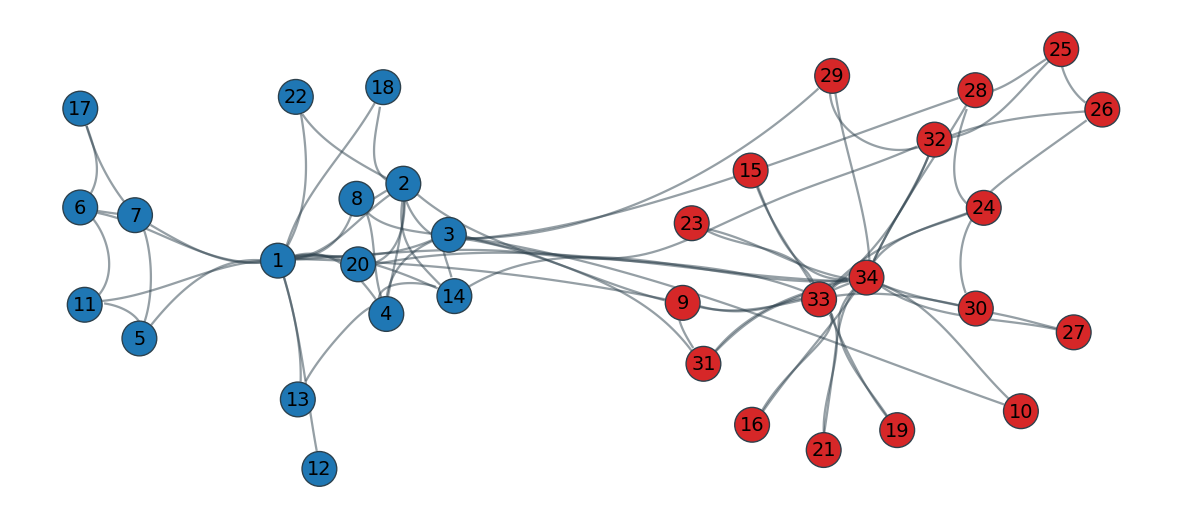

In [13]:
partion = {node-1: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

community_to_color = {
    0: 'tab:blue',
    1: 'tab:red',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:pink',
}

node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}



plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)
)
plt.show()

#### 1.2 Football

In [14]:

file_path = '../data/reel/football/football.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    '../data/reel/football/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 115 nodes.


In [15]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 16 , alpha= .98, beta =1.02 )
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

duration = end_time - start_time
nmi = trace[Kbest-2]["NMI"]

print(f"Time elapsed : {duration} s ")
print(f"NMI = {nmi}")
print(f"Modularity = {trace[Kbest-2]['Modularity']}")
print(f"Number of communities : {Kbest}")
custom_df_styling(trace)

No more nodes to select , k is too large
Time elapsed : 2.223874092102051 s 
NMI = 0.9159301693333538
Modularity = 0.5975386474137037
Number of communities : 11


K,Modularity,Similarity-Based Modularity,NMI
2,0.309099,0.158927,0.373122
3,0.445967,0.227361,0.529830
4,0.509371,0.259063,0.629133
5,0.570996,0.289876,0.702469
6,0.539850,0.274303,0.720661
7,0.573387,0.291071,0.793762
8,0.579100,0.293928,0.837429
9,0.584343,0.296549,0.863803
10,0.597392,0.303074,0.906546
11,0.597539,0.303147,0.915930


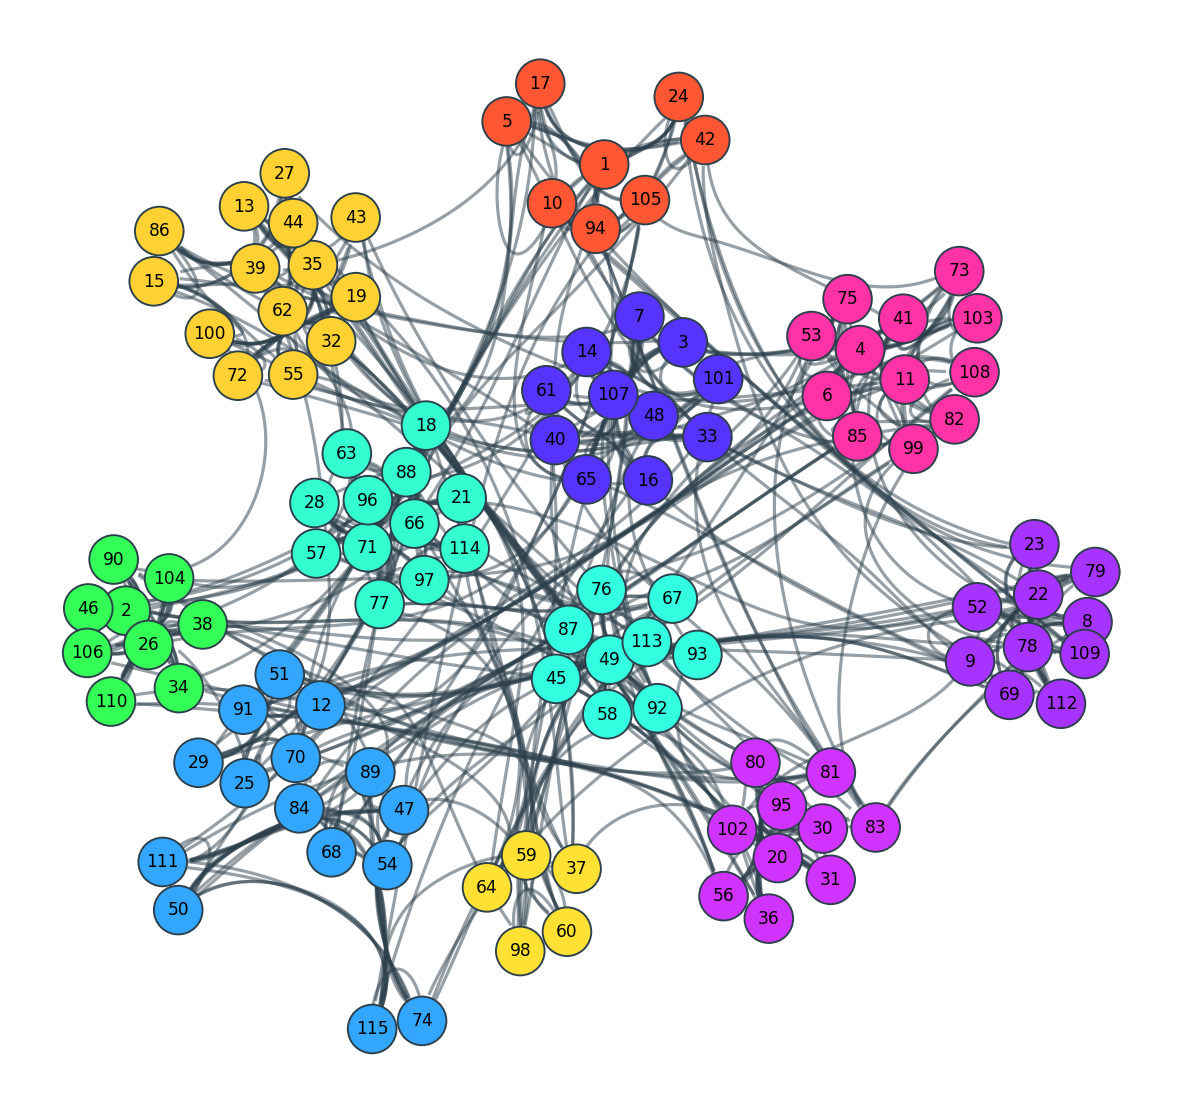

In [16]:
partion = {node: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

community_to_color = {
    0: "#FF5733",
    1: "#33FF57",
    2: "#5733FF",
    3: "#FF33A6",
    4: "#A633FF",
    5: "#33A6FF",
    6: "#FFD133",
    7: "#33FFD1",
    8: "#D133FF",
    9: "#FFE133",
    10: "#33FFE1"
   
}

node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}

plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)
)
plt.show()

#### 1.3 Dolphins

In [17]:

file_path = '../data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    '../data/reel/dolphins/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 62 nodes.


In [18]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 16)
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

duration = end_time - start_time
nmi = trace[Kbest-2]["NMI"]

print(f"Time elapsed : {duration} s ")
print(f"NMI = {nmi}")
print(f"Modularity = {trace[Kbest-2]['Modularity']}")
print(f"Number of communities : {Kbest}")
custom_df_styling(trace)

No more nodes to select , k is too large
Time elapsed : 0.6206741333007812 s 
NMI = 0.7769437310361903
Modularity = 0.3698231873739171
Number of communities : 2


K,Modularity,Similarity-Based Modularity,NMI
2,0.369823,0.195611,0.776944
3,0.282880,0.152140,0.331389
4,0.353032,0.187216,0.297585
5,0.347534,0.184467,0.391953
6,0.271627,0.146513,0.206640
7,0.349432,0.185416,0.273392


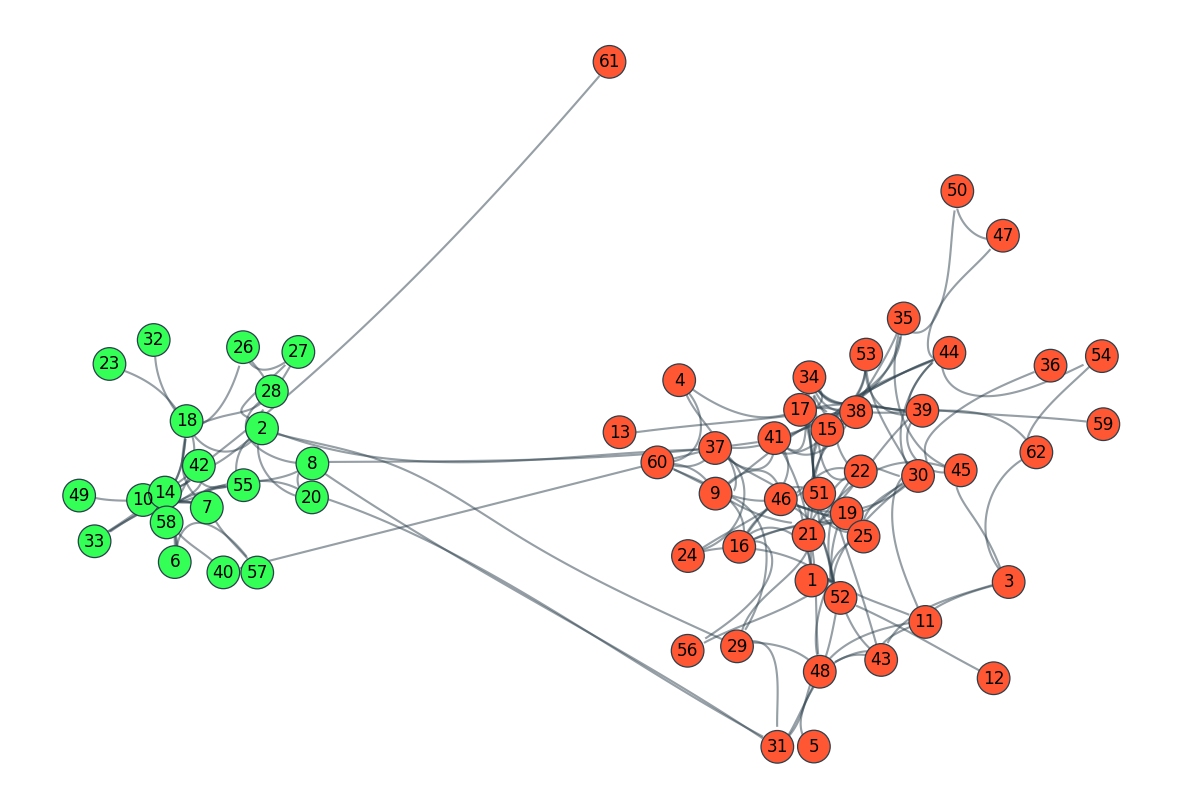

In [19]:
partion = {node: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

community_to_color = {
    0: "#FF5733",
    1: "#33FF57",
    2: "#5733FF",
    3: "#FF33A6",
    4: "#A633FF",
    5: "#33A6FF",
    6: "#FFD133",
    7: "#33FFD1",
    8: "#D133FF",
    9: "#FFE133",
    10: "#33FFE1"

}

node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}


plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)
)
plt.show()

### Datasets Synth

#### 2.1 LFR .15

In [30]:

file_path = '../data/synth/LFR/0.15/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]
true_communities = read_community_labels_file_synth(
    "../data/synth/LFR/0.15/community.dat")

In [31]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 16)
end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))

duration = end_time - start_time
nmi = trace[Kbest-2]["NMI"]

print(f"Time elapsed : {duration} s ")
print(f"NMI = {nmi}")
print(f"Modularity = {trace[Kbest-2]['Modularity']}")
print(f"Number of communities : {Kbest}")
custom_df_styling(trace)


Time elapsed : 2.7168338298797607 s 
NMI = 1.0
Modularity = 0.6015625
Number of communities : 4


K,Modularity,Similarity-Based Modularity,NMI
2,0.406250,0.207031,0.666667
3,0.500977,0.254395,0.857143
4,0.601562,0.304688,1.000000
5,0.496582,0.252197,0.941803
6,0.443359,0.225586,0.894618
7,0.375854,0.191833,0.847372
8,0.353882,0.180847,0.829674
9,0.317383,0.162598,0.805359
10,0.294800,0.151306,0.782276
11,0.294067,0.150940,0.766948


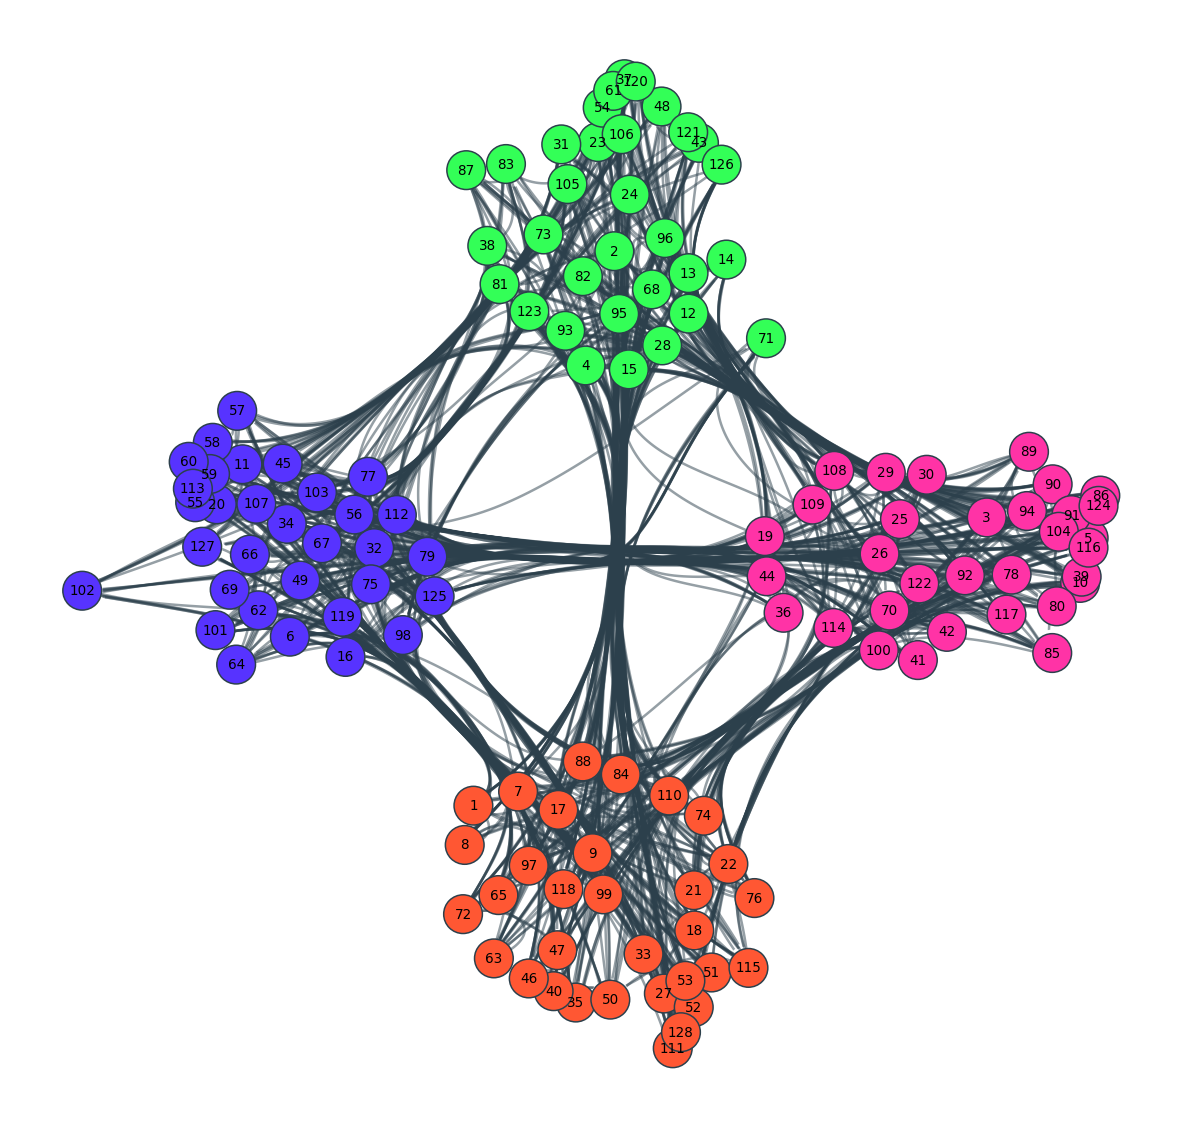

In [22]:
partion = {node-1: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

community_to_color = {
    0: "#FF5733",
    1: "#33FF57",
    2: "#5733FF",
    3: "#FF33A6",
    4: "#A633FF",
    5: "#33A6FF",
    6: "#FFD133",
    7: "#33FFD1",
    8: "#D133FF",
    9: "#FFE133",
    10: "#33FFE1"

}

node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}


plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)
)
plt.show()

#### 2.2 LFR .40

In [32]:

file_path = '../data/synth/LFR/0.40/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]
true_communities = read_community_labels_file_synth(
    "../data/synth/LFR/0.40/community.dat")

In [33]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 16)
end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))

duration = end_time - start_time
nmi = trace[Kbest-2]["NMI"]

print(f"Time elapsed : {duration} s ")
print(f"NMI = {nmi}")
print(f"Modularity = {trace[Kbest-2]['Modularity']}")
print(f"Number of communities : {Kbest}")
custom_df_styling(trace)

Time elapsed : 2.7230474948883057 s 
NMI = 1.0
Modularity = 0.34765625
Number of communities : 4


K,Modularity,Similarity-Based Modularity,NMI
2,0.177612,0.092712,0.547754
3,0.295532,0.151672,0.804917
4,0.347656,0.177734,1.000000
5,0.277832,0.142822,0.941803
6,0.239136,0.123474,0.896000
7,0.198975,0.103394,0.851720
8,0.135010,0.071411,0.809135
9,0.112183,0.059998,0.763122
10,0.112183,0.059998,0.740310
11,0.087891,0.047852,0.734080


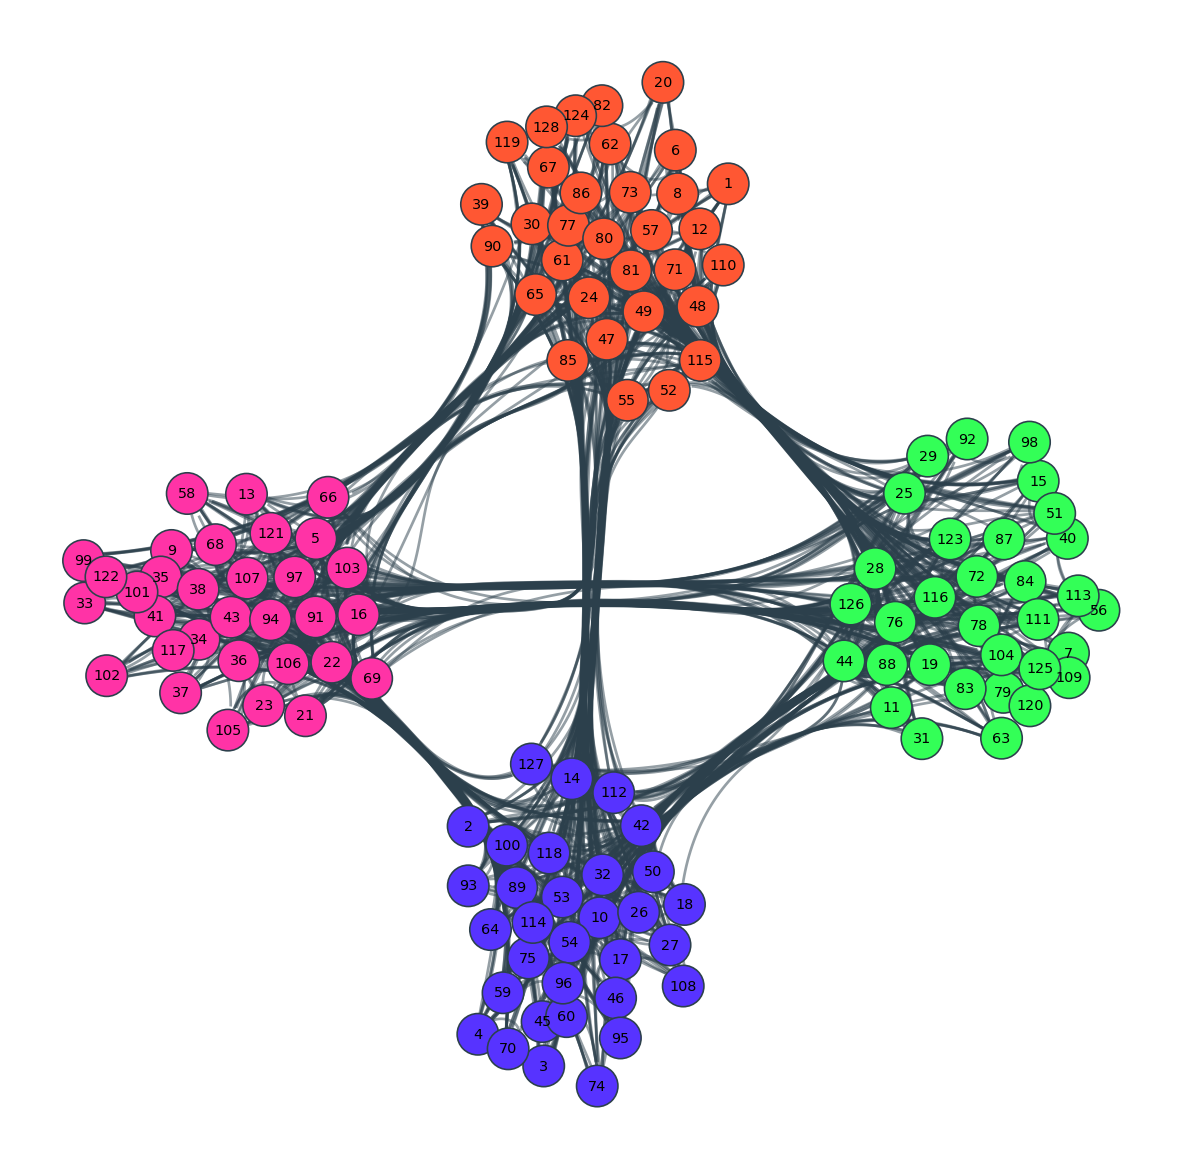

In [25]:
partion = {node-1: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

community_to_color = {
    0: "#FF5733",
    1: "#33FF57",
    2: "#5733FF",
    3: "#FF33A6",
    4: "#A633FF",
    5: "#33A6FF",
    6: "#FFD133",
    7: "#33FFD1",
    8: "#D133FF",
    9: "#FFE133",
    10: "#33FFE1"

}

node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}


plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)
)
plt.show()

#### 2.3 LFR .50

In [34]:

file_path = '../data/synth/LFR/0.50/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]
true_communities = read_community_labels_file_synth(
    "../data/synth/LFR/0.50/community.dat")

In [35]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 16)
end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))

duration = end_time - start_time
nmi = trace[Kbest-2]["NMI"]

print(f"Time elapsed : {duration} s ")
print(f"NMI = {nmi}")
print(f"Modularity = {trace[Kbest-2]['Modularity']}")
print(f"Number of communities : {Kbest}")
custom_df_styling(trace)

Time elapsed : 2.598292350769043 s 
NMI = 0.08642417975758253
Modularity = -0.0045166015625
Number of communities : 5


K,Modularity,Similarity-Based Modularity,NMI
2,-0.074707,-0.033447,0.020812
3,-0.026733,-0.009460,0.081691
4,-0.043579,-0.017883,0.096767
5,-0.004517,0.001648,0.086424
6,-0.035522,-0.013855,0.082814
7,-0.036377,-0.014282,0.093833
8,-0.043091,-0.017639,0.130410
9,-0.045898,-0.019043,0.130410
10,-0.035645,-0.013916,0.140707
11,-0.033203,-0.012695,0.179947


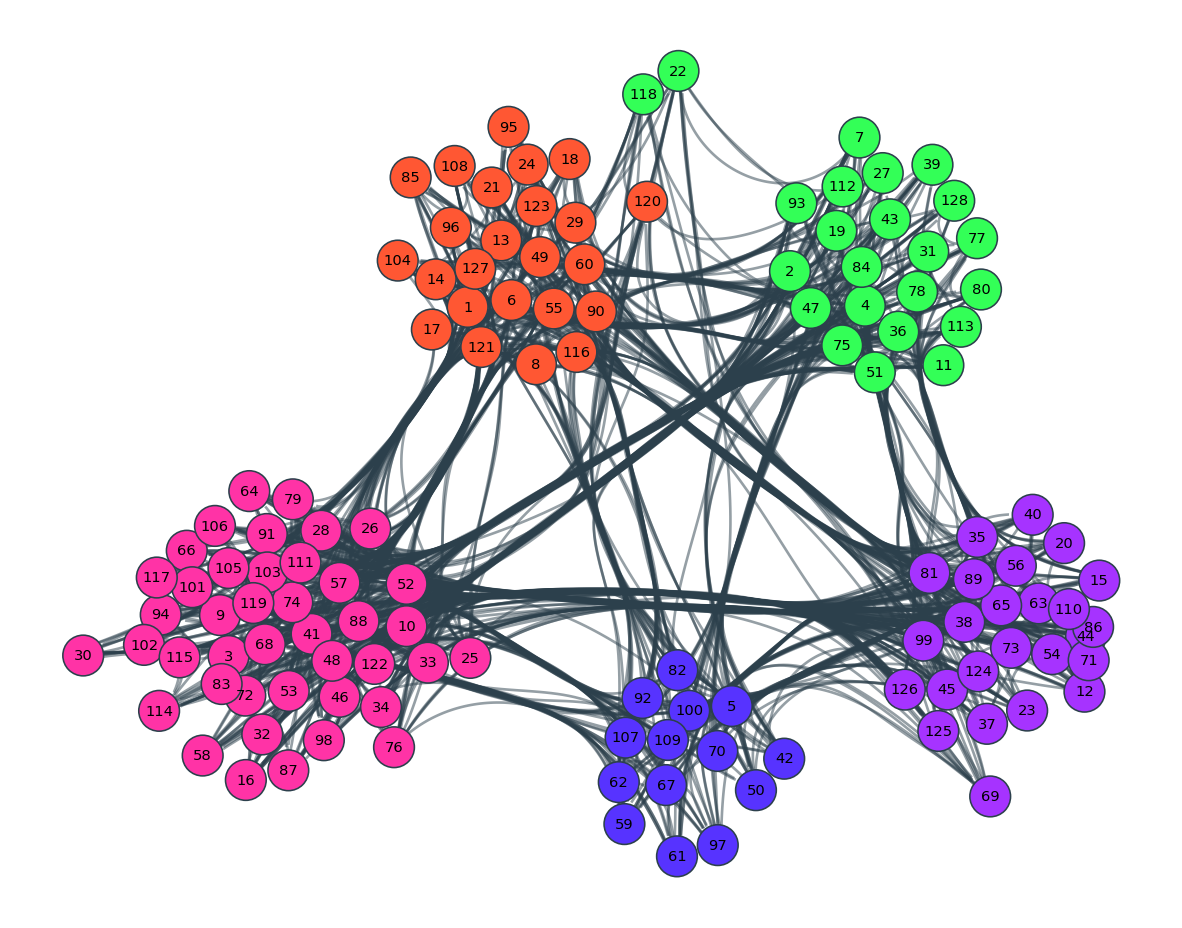

In [28]:
partion = {node-1: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

community_to_color = {
    0: "#FF5733",
    1: "#33FF57",
    2: "#5733FF",
    3: "#FF33A6",
    4: "#A633FF",
    5: "#33A6FF",
    6: "#FFD133",
    7: "#33FFD1",
    8: "#D133FF",
    9: "#FFE133",
    10: "#33FFE1"

}

node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}


plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)
)
plt.show()